<p style="font-size:25px;"><strong>Análisis de ventas globales de videojuegos entre los años 1980-2020</strong></p>

#### **>El dataset contiene información sobre las ventas globales de videojuegos en diferentes plataformas y géneros, abarcando varias regiones.**

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

# Leer archivo CSV
df = pd.read_csv('vgsales.csv')

#Rellenar campos vacíos
df = df.fillna(value=0)

#Convertir datatype de columna Year
df['Year'] = df['Year'].astype('int64')

# Crear conexión a SQLite
conn = sqlite3.connect('ventas_videojuegos.db')

# Guardar los datos en una tabla SQL
df.to_sql('ventas', conn, if_exists='replace', index=False)

16598

In [86]:
# Consulta SQL para ver los primeros registros
query = "SELECT * FROM ventas LIMIT 10"
df_preview = pd.read_sql(query, conn)
df_preview

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [87]:
#Plataformas mas populares
query = """
WITH Total_Ventas AS (
    SELECT SUM(Global_Sales) AS Total_Global_Sales
    FROM ventas
)
SELECT Platform, 
       COUNT(*) AS Num_Juegos, 
       SUM(Global_Sales) AS Ventas_Globales, 
       Publisher,
       PRINTF('%.2f', (SUM(Global_Sales) * 100.0 / (SELECT Total_Global_Sales FROM Total_Ventas))) AS Pct_Ventas_Globales
FROM ventas
GROUP BY Platform
ORDER BY Ventas_Globales DESC;

"""
# Ejecutar la consulta y guardar el resultado en un DataFrame
df_platforms = pd.read_sql(query, conn)

# Formatear la columna 'Ventas_Globales' para que muestre solo dos decimales
df_platforms['Ventas_Globales'] = df_platforms['Ventas_Globales'].map(lambda x: f'{x:.2f}')

# Aplicar estilo al DataFrame
df_platforms_styled = df_platforms.style.map(lambda x: 'background-color: rgba(33, 141, 95, 0.4)')

df_platforms_styled

,Platform,Num_Juegos,Ventas_Globales,Publisher,Pct_Ventas_Globales
0,PS2,2161,1255.64,Take-Two Interactive,14.08
1,X360,1265,979.96,Microsoft Game Studios,10.99
2,PS3,1329,957.84,Take-Two Interactive,10.74
3,Wii,1325,926.71,Nintendo,10.39
4,DS,2163,822.49,Nintendo,9.22
5,PS,1196,730.66,Sony Computer Entertainment,8.19
6,GBA,822,318.50,Nintendo,3.57
7,PSP,1213,296.28,Take-Two Interactive,3.32
8,PS4,336,278.10,Activision,3.12
9,PC,960,258.82,Electronic Arts,2.90


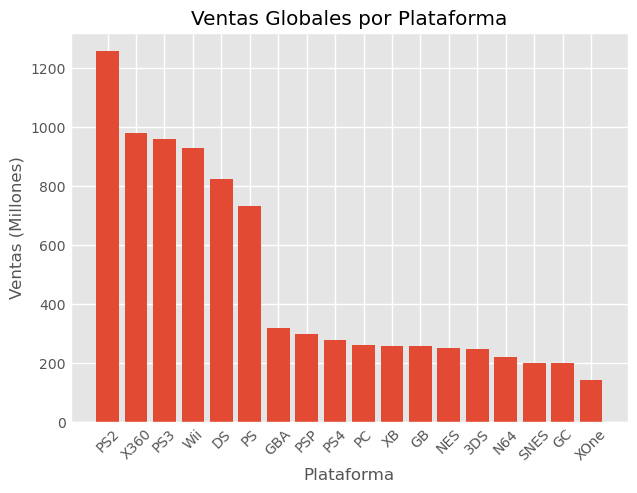

In [96]:
# Consulta SQL para ventas por plataforma sobre 100 millones
query = """
SELECT Platform, SUM(Global_Sales) as Ventas_Globales
FROM ventas
GROUP BY Platform
HAVING Ventas_Globales >= 100
ORDER BY Ventas_Globales DESC
"""
df_platform_sales = pd.read_sql(query, conn)

# Crear gráfico
plt.bar(df_platform_sales['Platform'], df_platform_sales['Ventas_Globales'])
plt.title('Ventas Globales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas (Millones)')
plt.xticks(rotation=45)
plt.style.use('fivethirtyeight') 
plt.show()

#### **A partir de los datos, se observa que la plataforma con mayores ventas globales fue `PS2`, seguida por `X360` y `PS3`. Las ventas de `PS2` representan aproximadamente el 14% del total global.**

In [89]:
#Compañias mas populares
query = """
SELECT Publisher, COUNT(*) as Num_Juegos, SUM(Global_Sales) as Ventas_Globales 
FROM ventas 
GROUP BY Publisher
ORDER BY Ventas_Globales DESC
LIMIT 10
"""
df_publisher = pd.read_sql(query, conn)
df_publisher['Ventas_Globales'] = df_publisher['Ventas_Globales'].map(lambda x: f'{x:.2f}')
df_publisher_styled = df_publisher.style.map(lambda x: 'background-color: rgba(33, 141, 95, 0.4)')
df_publisher_styled

,Publisher,Num_Juegos,Ventas_Globales
0,Nintendo,703,1786.56
1,Electronic Arts,1351,1110.32
2,Activision,975,727.46
3,Sony Computer Entertainment,683,607.50
4,Ubisoft,921,474.72
5,Take-Two Interactive,413,399.54
6,THQ,715,340.77
7,Konami Digital Entertainment,832,283.64
8,Sega,639,272.99
9,Namco Bandai Games,932,254.09


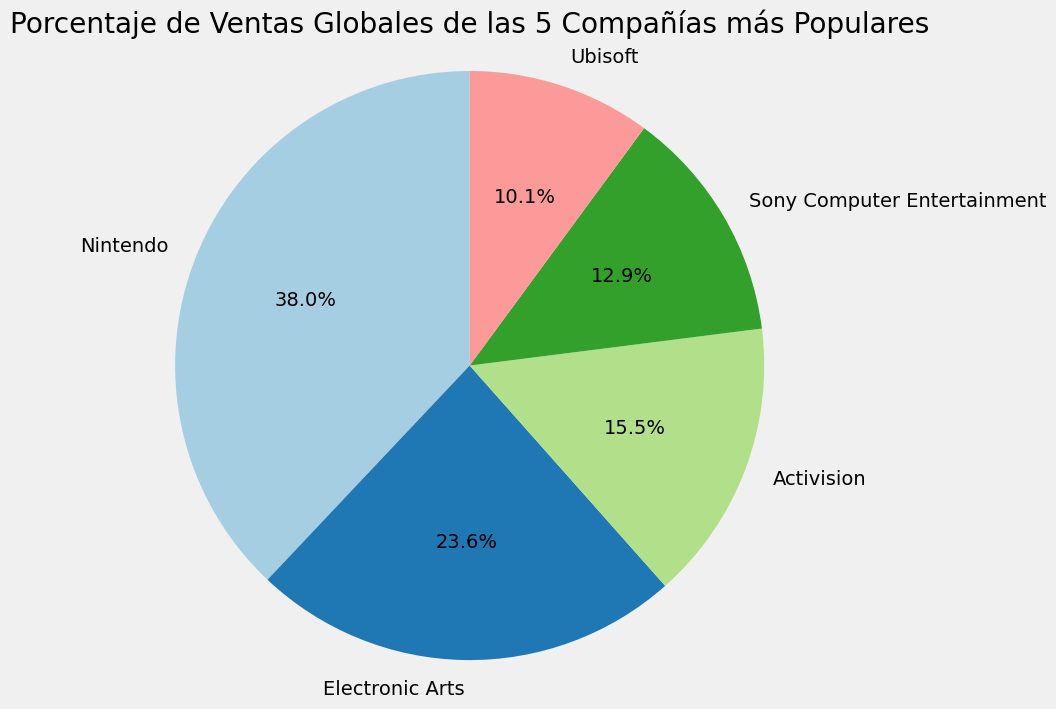

In [90]:
query_top_p = """
SELECT Publisher, SUM(Global_Sales) as Ventas_Globales 
FROM ventas 
GROUP BY Publisher
ORDER BY Ventas_Globales DESC
LIMIT 5
"""

df_top_publishers = pd.read_sql(query_top_p, conn)

# Extraer los datos del DataFrame
labels = df_top_publishers['Publisher']          
sizes = df_top_publishers['Ventas_Globales']      

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))  # Tamaño de la figura
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Asegurar que el gráfico de pastel sea un círculo
plt.axis('equal')

plt.title('Porcentaje de Ventas Globales de las 5 Compañías más Populares')

plt.show()

#### **La compañía más popular es `Nintendo`, seguido de `Electronic Arts` y `Activision`. Cabe destacar que la superioridad de Nintendo la logra con una consirable cantidad menor de juegos**

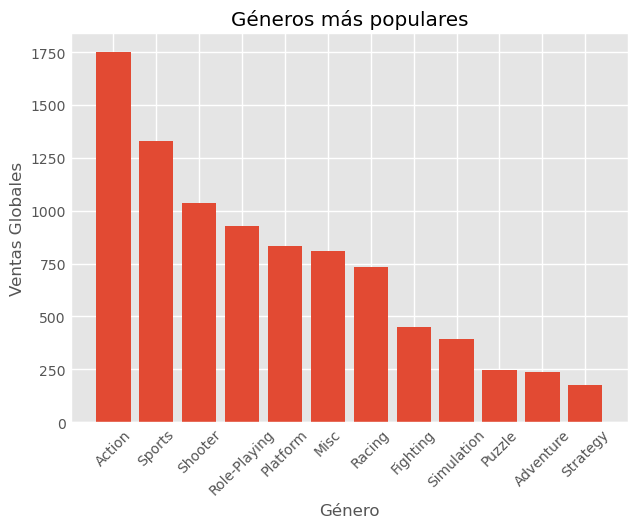

In [98]:
# Género mas popular
query = """
SELECT Genre, SUM(Global_Sales) as Ventas_Globales
FROM ventas
GROUP BY Genre
ORDER BY Ventas_Globales DESC
"""
df_top_genre = pd.read_sql(query, conn)

# Crear gráfico
plt.bar(df_top_genre['Genre'], df_top_genre['Ventas_Globales'])
plt.title('Géneros más populares')
plt.xlabel('Género')
plt.ylabel('Ventas Globales')
plt.xticks(rotation=45)
plt.style.use('fivethirtyeight') 
plt.show()

#### **El género más popular en términos de ventas es `Action`, seguido de `Sports` y `Shooter`. Esto sugiere que los juegos de acción tienen una gran demanda en todas las plataformas.**

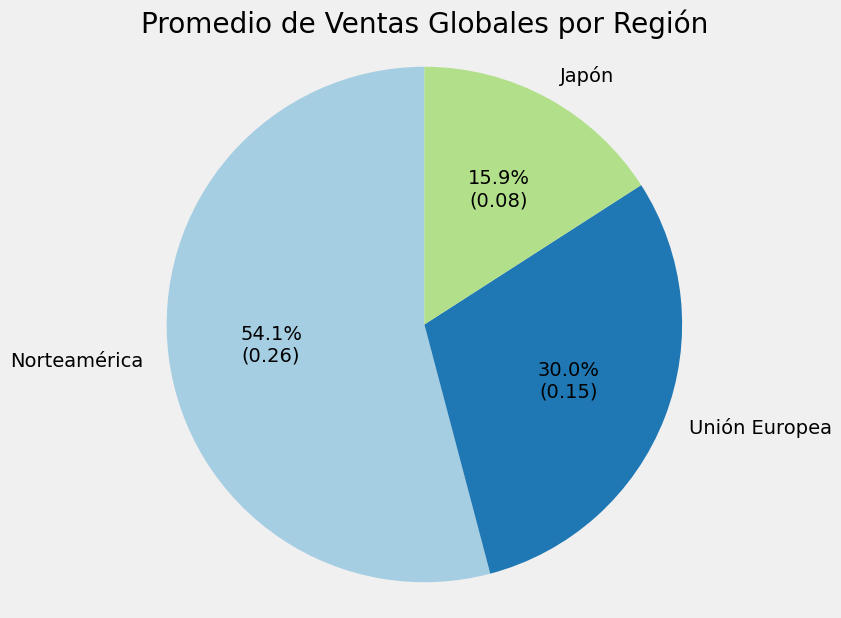

In [92]:
#Promedio de ventas por región

promedio_ventas_NA = df['NA_Sales'].mean()
promedio_ventas_EU = df['EU_Sales'].mean()
promedio_ventas_JP = df['JP_Sales'].mean()

ventas_por_region = [promedio_ventas_NA, promedio_ventas_EU, promedio_ventas_JP]

labels = ['Norteamérica', 'Unión Europea', 'Japón']

# Función personalizada para mostrar el porcentaje y el valor del promedio
def func(pct, allvalues):
    absolute = pct / 100. * np.sum(allvalues)
    return f'{pct:.1f}%\n({absolute:.2f})'

plt.figure(figsize=(7, 7))
plt.pie(ventas_por_region, 
        labels=labels, 
        autopct=lambda pct: func(pct, ventas_por_region), 
        startangle=90, 
        colors=plt.cm.Paired.colors, 
        textprops={'color': 'black'}) 

plt.axis('equal')

plt.title('Promedio de Ventas Globales por Región', color='black')

plt.show()

#### **La región de `North America` domina las ventas globales, seguida por `Europe`. En Japón y otras regiones, las ventas son significativamente menores.**

In [93]:
#Ventas a lo largo de los años
query = """
SELECT Year, SUM(Global_Sales) as Ventas_Globales
FROM ventas
GROUP BY Year
HAVING Year > 0
ORDER BY Ventas_Globales DESC
"""
df_years = pd.read_sql(query, conn)

df_years['Ventas_Globales'] = df_years['Ventas_Globales'].map(lambda x: f'{x:.2f}')

df_years_styled = df_years.style.map(lambda x: 'background-color: rgba(33, 141, 95, 0.4)')

df_years_styled

,Year,Ventas_Globales
0,2008,678.90
1,2009,667.30
2,2007,611.13
3,2010,600.45
4,2006,521.04
5,2011,515.99
6,2005,459.94
7,2004,419.31
8,2002,395.52
9,2013,368.11


#### **Se observa que entre los años 2006 y 2011 se concentra la mayor cantidad de ventas globales**

In [94]:
#Juegos con mas ventas globales
query_top = """
SELECT Name, Platform, Year, Genre, Global_Sales
FROM ventas
ORDER BY Global_Sales DESC
LIMIT 3
"""
df_top_games = pd.read_sql(query_top, conn)
df_top_games['Global_Sales'] = df_top_games['Global_Sales'].map(lambda x: f'{x:.2f}')
df_top_games_styled = df_top_games.style.map(lambda x: 'background-color: rgba(33, 141, 95, 0.4)')
df_top_games_styled

,Name,Platform,Year,Genre,Global_Sales
0,Wii Sports,Wii,2006,Sports,82.74
1,Super Mario Bros.,NES,1985,Platform,40.24
2,Mario Kart Wii,Wii,2008,Racing,35.82


#### **Podemos observar que los 3 juegos más vendidos son de `Nintendo`, y que 2 de ellos corresponden al mundo de `Mario Bros`.**

### Conclusiones

1. **Dominancia de ciertas plataformas**: El análisis mostró que las plataformas `PS2`, `X360`, y `PS3` son líderes en ventas globales. Esto es una señal clara de la popularidad sostenida de estas consolas a lo largo de los años. No obstante, la compañía lider en ventas globales es `Nintendo`.

2. **Preferencias de género**: Los juegos de acción y deportes son los que generan mayor demanda. Este dato es crucial para las empresas de desarrollo de videojuegos que buscan maximizar sus ingresos a través de géneros que atraen más a los jugadores.

3. **Ventas regionales**: Norteamérica y Europa son las principales regiones para las ventas globales, mientras que otras regiones aún tienen espacio para crecer. Este análisis podría ayudar a diseñar estrategias de marketing específicas para aumentar las ventas en regiones menos explotadas como Asia.

4. **Tendencias temporales**: Aunque las ventas globales alcanzaron su punto más alto alrededor de 2008, parece haber una disminución en años recientes. Esto podría sugerir un cambio en el mercado, como el crecimiento de los juegos móviles y el streaming.